**Carga del conjunto de datos MNIST:**

In [6]:
import keras
mnist = keras.datasets.mnist
(training_images,training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**Visualización de una muestra**

Label:0
Image:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 

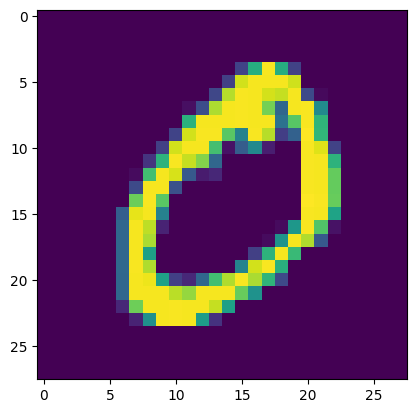

In [7]:
import numpy as np
import matplotlib.pyplot as plt

index = 1

np.set_printoptions(linewidth=320)
print(f"Label:{training_labels[index]}")
print(f"Image:{training_images[index]}")

plt.imshow(training_images[index])

**Normalización de los datos**

In [8]:
training_images = training_images / 255.0
test_images = test_images / 255.0

**Construcción del modelo**

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

**Compilación del modelo**

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Entrenamiento del modelo**

In [11]:
history = model.fit(training_images, training_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2581 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1151 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0797 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0580 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0354 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.014

**Graficar el historial de entrenamiento**

<Axes: >

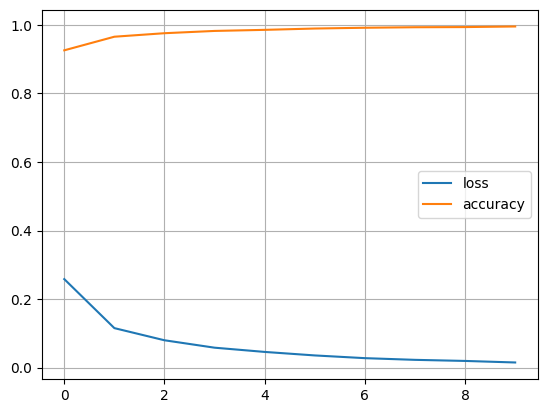

In [12]:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

**Evaluación del modelo**

In [13]:
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)



1875/1875 [==============================] - 5s 3ms/step - loss: 0.0178 - accuracy: 0.9939
Pérdida en el conjunto de entrenamiento: 0.017779087647795677
Precisión en el conjunto de entrenamiento: 0.9938833117485046
313/313 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 0.9750
Pérdida en el conjunto de prueba: 0.09504981338977814
Precisión en el conjunto de prueba: 0.9750000238418579


**Predicción de una muestra**

In [17]:
index = 2
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index: index+1])
print(f"Clasification:\n {classification.reshape(-1,1)}")

Label: 1
1/1 [==============================] - 0s 35ms/step
Clasification:
 [[2.2419644e-09]
 [9.9949956e-01]
 [3.5868725e-06]
 [3.7346817e-07]
 [3.6399958e-06]
 [5.0083725e-07]
 [8.1697277e-07]
 [8.3928870e-05]
 [4.0580923e-04]
 [1.7392174e-06]]
